In [1]:
# import libraries
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("titanic.csv") 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [7]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


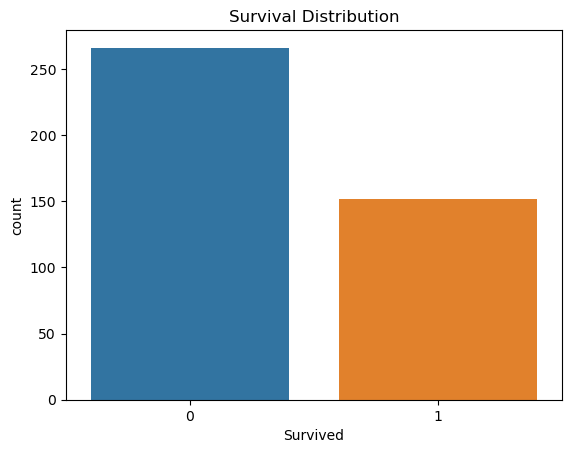

In [8]:
# Check  distribution of the target variable (Survived)
sns.countplot(data=df , x='Survived')
plt.title('Survival Distribution')
plt.show()

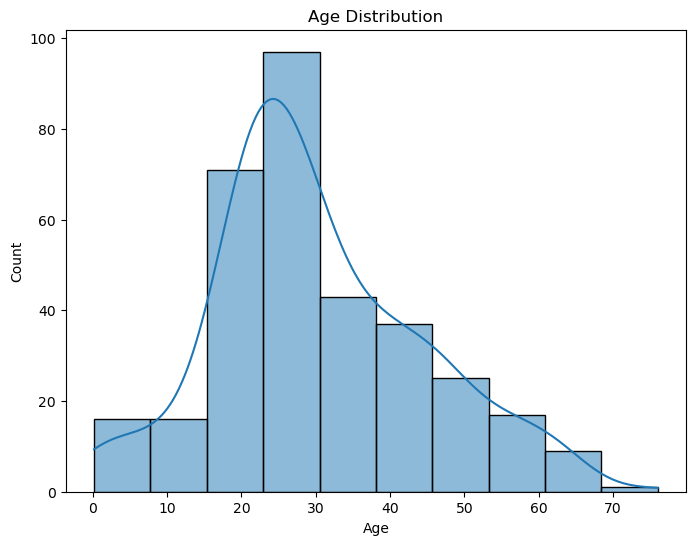

In [9]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

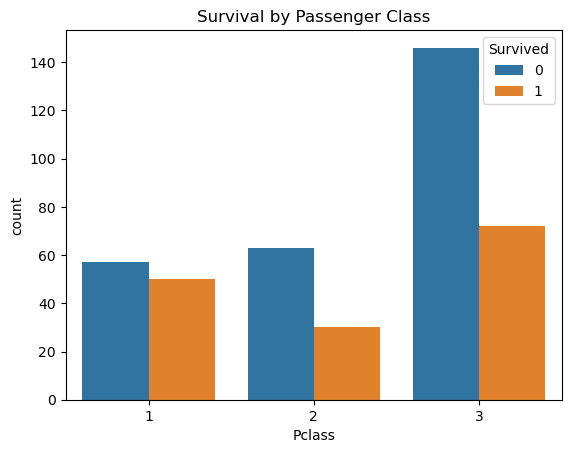

In [10]:
#Analyze column Pclass 
sns.countplot( x='Pclass', hue='Survived'  ,data=df)
plt.title('Survival by Passenger Class')
plt.show()

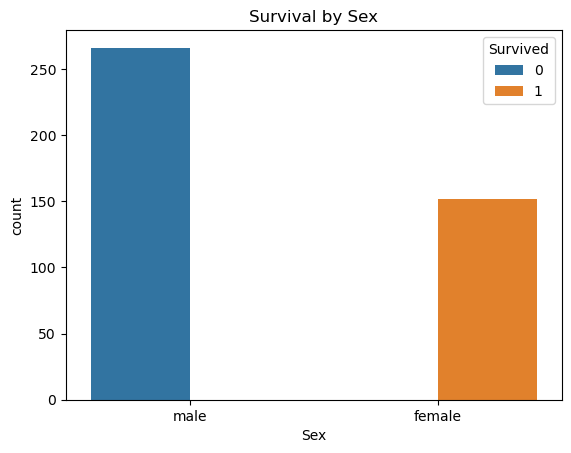

In [11]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

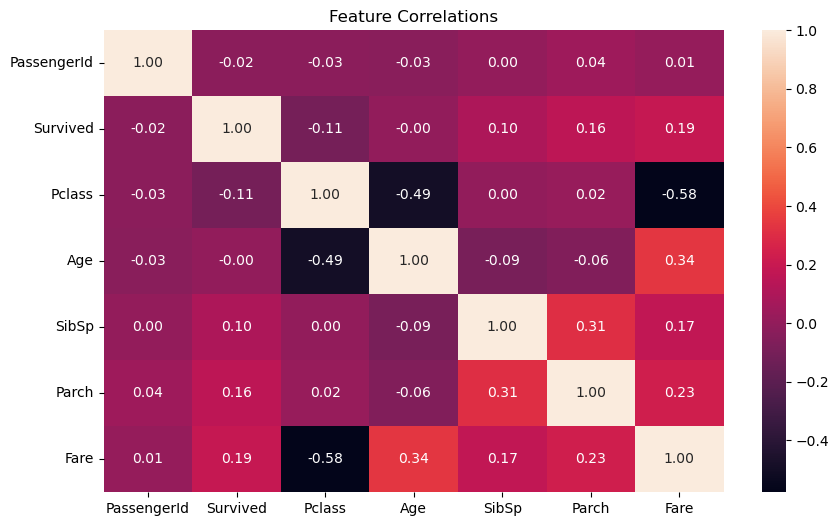

In [12]:
# Correlation heatmap
col_num=df.select_dtypes(exclude="object").columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_num].corr(), annot=True, 
            
            fmt='.2f')
plt.title('Feature Correlations')
plt.show()

In [13]:
# Fill missing values for Age using median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [14]:
# Fill missing values for Embarked using the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [15]:
# Drop the 'Cabin' column due to a large number of missing values
df.drop(columns=['Cabin'], inplace=True)

In [16]:
# Feature engineering: Extract titles from names
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(df['Title'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,Mr


In [18]:
# Group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [19]:
print(df['Title'].value_counts())

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


In [20]:
# Convert categorical 'Sex', 'Embarked', and 'Title' to numerical values using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

In [21]:
# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [22]:
# Drop irrelevant columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [23]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
X =  df.drop(columns = "Survived")
y = df["Survived"]

In [26]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Check the shapes of the resulting datasets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (291, 9)
Testing set features shape: (126, 9)
Training set target shape: (291,)
Testing set target shape: (126,)


In [28]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
  
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    model_metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Cross-Validated Accuracy": np.mean(cv_scores)
    }

    return model_metrics

In [30]:
def plot_confusion_matrix(y_test, predictions, model_name):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Logistic Regression

In [32]:
log_model = LogisticRegression()

In [33]:
# Logistic Regression
log_model = LogisticRegression()
log_metrics = train_and_evaluate_model(log_model, X_train, y_train, X_test, y_test)

In [34]:
# Display metrics outside the function
print("Logistic Regression Metrics:")
for metric, value in log_metrics.items():
    print(f"{metric}: {value:.2f}")

Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Cross-Validated Accuracy: 1.00


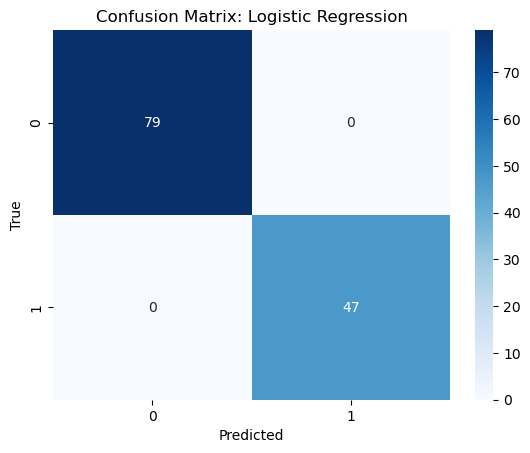

In [35]:
# Predictions for confusion matrix
log_predictions = log_model.predict(X_test)
plot_confusion_matrix(y_test, log_predictions, "Logistic Regression")

# Random Forest

In [36]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metrics = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

In [37]:
# Display metrics outside the function
print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.2f}")

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Cross-Validated Accuracy: 1.00


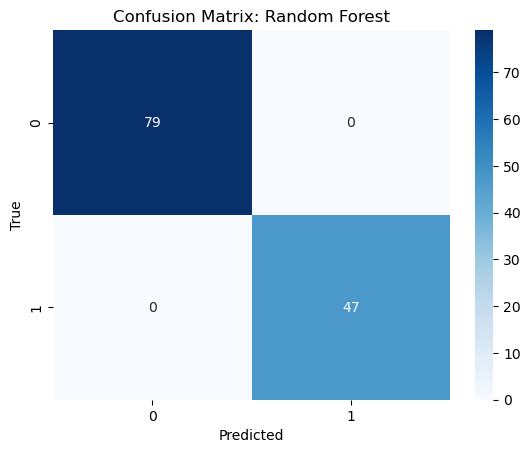

In [38]:
# Predictions for confusion matrix
rf_predictions = rf_model.predict(X_test)
plot_confusion_matrix(y_test, rf_predictions, "Random Forest")

# KNN

In [39]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics = train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test)

In [ ]:
# Display metrics outside the function
print("K-Nearest Neighbors Metrics:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.2f}")